In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from parse import parse

from alphaMusic.utils.fls_utils import load_from_pkl
import alphaMusic.evaluation as evl

In [113]:
sns.set(style='whitegrid', context='paper', font_scale=1.2,
        rc={
            'figure.figsize':(3.5,3.15), 
            'lines.linewidth':1.5,
            'font.family': 'serif',
            'text.usetex': False,
            })
pal = sns.cubehelix_palette(7, start=0.5, rot=-0.5,dark=0.3, light=.75, reverse=True, hue=1.)

In [41]:
path_to_results = Path('..','recipes','EUSIPCO22','results')
assert path_to_results.exists()

files = path_to_results.glob('N:180*SNR:sweep*.pkl')
exp_name = 'N:{n_samples}_RT60:{rt60_name}_SNR:{snr_name}_DRR:{drr_name}_nsrcs:{n_srcs}_nmics:{n_mics}_noise:{noise_type}'

results = pd.DataFrame()
for file in files:
    print(file)
    params = parse(exp_name,str(file.name))
    df = load_from_pkl(file)
    df['n_mics'] = int(params['n_mics'])
    df['n_srcs'] = int(params['n_srcs'])
    results = pd.concat([results, df], ignore_index=True)

../recipes/EUSIPCO22/results/N:180_RT60:0.25_SNR:sweep_DRR:1.0_nsrcs:1_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:0.25_SNR:sweep_DRR:1.0_nsrcs:2_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:0.25_SNR:sweep_DRR:1.0_nsrcs:4_nmics:4_noise:cafet_results.pkl
../recipes/EUSIPCO22/results/N:180_RT60:0.25_SNR:sweep_DRR:1.0_nsrcs:3_nmics:4_noise:cafet_results.pkl


In [106]:
df = pd.DataFrame()

for r, row in results.iterrows():
    
    # compute metrics
    doas_est = row['DOAs_est']
    doas_ref = row['DOAs']
    
    metrics = evl.compute_ssl_metrics(doas_est, doas_ref)
    
    df.at[r,'algo'] = row['algo']

    df.at[r,'MAE'] = metrics['MAE']
    df.at[r,'RMSE'] = metrics['RMSE']
    df.at[r,'ACC5'] = metrics['ACC5']
    df.at[r,'ACC10'] = metrics['ACC10']
    df.at[r,'MISS'] = metrics['MISS']
    
    # params
    df.at[r,'SNR'] = row['SNR']
    df.at[r,'RT60'] = row['RT60']
    df.at[r,'n_mics'] = row['n_mics']
    df.at[r,'n_srcs'] = row['n_srcs']
    df.at[r,'alpha'] = row['alpha']
    df.at[r,'p'] = row['p']
    df.at[r,'time'] = row['time']
    
    if row['algo'] in ['aMUSIC', 'aNormMUSIC']:
        if row['alpha'] == 1.8:
            a = 'a=1.8'
        elif row['alpha'] == 1.5:
            a = 'a=1.5'
        else:
            a = 'a=est'
        if row['p'] == 1.5:
            p = 'p=1.5'
        elif row['p'] == 1:
            p = 'p=1'
        df.at[r,'sub_algo'] = f"{row['algo']}_{a}_{p}"

In [107]:
df.head(40)

,algo,MAE,RMSE,ACC5,ACC10,MISS,SNR,RT60,n_mics,n_srcs,alpha,p,time,sub_algo
0,MUSIC,17.0,17.0,0.0,0.0,0.0,10.0,0.25,4.0,1.0,NaN,NaN,0.033416,NaN
1,aMUSIC,6.0,6.0,0.0,100.0,0.0,10.0,0.25,4.0,1.0,1.285778,1.0,0.052515,aMUSIC_a=est_p=1
2,aMUSIC,0.0,0.0,100.0,100.0,0.0,10.0,0.25,4.0,1.0,1.500000,1.0,0.029964,aMUSIC_a=1.5_p=1
3,aMUSIC,3.0,3.0,100.0,100.0,0.0,10.0,0.25,4.0,1.0,1.800000,1.0,0.021776,aMUSIC_a=1.8_p=1
4,aMUSIC,26.0,26.0,0.0,0.0,0.0,10.0,0.25,4.0,1.0,1.289312,1.5,0.035567,aMUSIC_a=est_p=1.5
5,aMUSIC,6.0,6.0,0.0,100.0,0.0,10.0,0.25,4.0,1.0,1.500000,1.5,0.022414,aMUSIC_a=1.5_p=1.5
6,aMUSIC,25.0,25.0,0.0,0.0,0.0,10.0,0.25,4.0,1.0,1.800000,1.5,0.022171,aMUSIC_a=1.8_p=1.5
7,NormMUSIC,5.0,5.0,0.0,100.0,0.0,10.0,0.25,4.0,1.0,NaN,NaN,0.014285,NaN
8,aNormMUSIC,4.0,4.0,100.0,100.0,0.0,10.0,0.25,4.0,1.0,1.296109,1.0,0.029259,aNormMUSIC_a=est_p=1
9,aNormMUSIC,3.0,3.0,100.0,100.0,0.0,10.0,0.25,4.0,1.0,1.500000,1.0,0.016642,aNormMUSIC_a=1.5_p=1


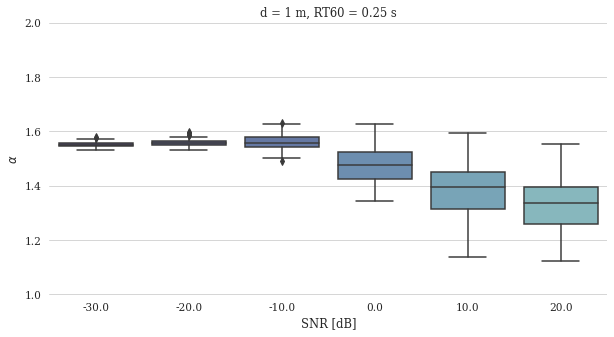

In [149]:
plt.figure(figsize=(10,5))
plt.title('d = 1 m, RT60 = 0.25 s')
sns.boxplot(x='SNR', y='alpha',
            palette=pal,
            data=df.loc[(df['algo'] == 'aMUSIC') & 
                        (df['alpha'] != 1.5) & (df['alpha'] != 1.8)
                       ])
plt.ylim((1,2))
plt.ylabel(r'$\alpha$')
plt.xlabel('SNR [dB]')
sns.despine(offset=10, trim=False, left=True, bottom=True)
plt.savefig('../recipes/EUSIPCO22/figures/alpha_SNR.pdf',dpi=300)
plt.show()

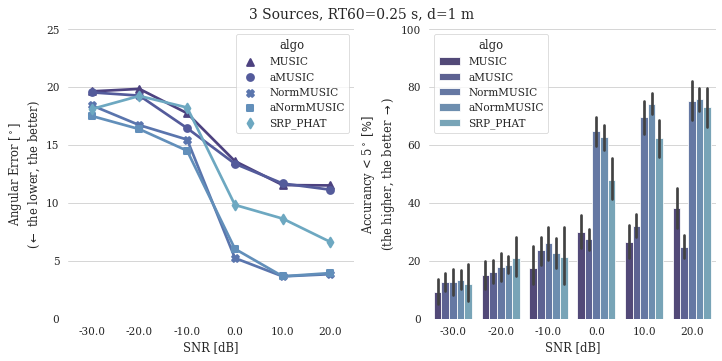

In [146]:
curr_df = df.loc[((df['alpha'] != 1.5) | (df['alpha'] != 1.8)) & (df['p'] != 1)]

for n_srcs in [3]:
    plt.figure(figsize=(10,5))
    plt.suptitle(f'{n_srcs} Sources, RT60=0.25 s, d=1 m')
    plt.subplot(121)
    sns.pointplot(x='SNR', y='MAE', hue='algo', 
                  palette=pal,
                  data=curr_df.loc[curr_df['n_srcs'] == n_srcs],
                  markers=['^','o','X','s','d','v','*'],
                  ci=None
    )
    plt.ylim([0,25])
    plt.ylabel('Angular Error [$^\circ$]\n' + r'($\leftarrow$ the lower, the better)')
    plt.xlabel('SNR [dB]')
    
    plt.subplot(122)
    sns.barplot(x='SNR', y='ACC5', hue='algo', 
                palette=pal,
                data=curr_df.loc[curr_df['n_srcs'] == n_srcs],
    )
    plt.ylim([0,100])
    plt.ylabel('Accurancy < 5$^\circ$ [$\%$]\n'+ r'(the higher, the better $\rightarrow$)')
    plt.xlabel('SNR [dB]')
    sns.despine(offset=10, trim=False, left=True, bottom=True)
    plt.tight_layout(pad=0.5)
plt.savefig('../recipes/EUSIPCO22/figures/mae_acc_3srcs_SNR.pdf',dpi=300)
plt.show()

In [150]:
# plt.figure(figsize=(20,5))
# plt.subplot(121)
# plt.title('p=1')
# sns.barplot(x='SNR', y='MAE', hue='sub_algo', data=df.loc[df['p'] == 1])
# plt.subplot(122)
# plt.title('p=1.5')
# sns.barplot(x='SNR', y='MAE', hue='sub_algo', data=df.loc[df['p'] == 1.5])
# plt.show()

In [151]:
# df.groupby(['sub_algo']).mean('MAE')['MAE']

In [152]:
# curr_df = df.loc[(df['alpha'] != 1.5) | (df['alpha'] != 1.8)]

# plt.figure(figsize=(10,5))
# plt.suptitle('For all SNR values')

# plt.subplot(121)
# sns.barplot(x='algo', y='MAE', data=curr_df[['algo','MAE']],
#            hue_order=algo_order, palette=pal)
# plt.ylim([0,30])
# plt.xticks(rotation=45)
# plt.ylabel('Angular Error [$^\circ$]\n' + r'($\leftarrow$ the lower, the better)')
# plt.xlabel('Algorithim')

# plt.subplot(122)
# sns.barplot(x='algo', y='ACC5', data=curr_df[['algo','ACC5']],
#            hue_order=algo_order, palette=pal)
# plt.ylim([0,100])
# plt.xticks(rotation=45)
# plt.ylabel('Accurancy < 5 $\circ$ [$\%$]\n'+ r'(the higher, the better $\rightarrow$)')
# plt.xlabel('Algorithim')

# sns.despine(offset=10, trim=False, left=True, bottom=True)
# plt.tight_layout(pad=0.5)
# plt.show()

In [153]:
# algo_order = ['MUSIC','aMUSIC_est','aMUSIC_fix',
#               'NormMUSIC','aNormMUSIC_est','aNormMUSIC_fix','SRP_PHAT']

# curr_df = df.loc[(df['alpha'] != 1.5) | (df['alpha'] != 1.8)]

# plt.figure(figsize=(10,5))
# plt.suptitle('For all SNR values')

# plt.subplot(121)
# sns.barplot(x='algo', y='MAE', data=curr_df[['algo','MAE']],
#            hue_order=algo_order, palette=pal)
# plt.ylim([0,30])
# plt.xticks(rotation=45)
# plt.ylabel('Angular Error [$^\circ$]\n' + r'($\leftarrow$ the lower, the better)')
# plt.xlabel('Algorithim')

# plt.subplot(122)
# sns.barplot(x='algo', y='ACC5', data=curr_df[['algo','ACC5']],
#            hue_order=algo_order, palette=pal)
# plt.ylim([0,100])
# plt.xticks(rotation=45)
# plt.ylabel('Accurancy < 5 $\circ$ [$\%$]\n'+ r'(the higher, the better $\rightarrow$)')
# plt.xlabel('Algorithim')

# sns.despine(offset=10, trim=False, left=True, bottom=True)
# plt.tight_layout(pad=0.5)
# plt.show()